**HOW HAS STATCAST CHANGED BASEBALL**

Major League Baseball introduced Statcast back in 2015. The most revolutionary and innovative technology ever unveiled in baseball added layers of complexity never before seen in the game. Through multiple cameras and radar, the league compiles metrics on things previously unheard of, such as pitch spin rate, route efficiency, and first step effectiveness.

As a result, Statcast created an "arms race" of data throughout baseball. Teams have compiled their data analysts to comb through these metrics and make critical decisions on how to play to gain every competitive advantage. This document looks to explore that competitive advantage. How has baseball changed since the introduction of the Statcast era? What makes successful players in today's league, and what trends are emerging with players as their career progresses in this data-driven game?

This topic is vast; therefore, this assignment will only look at pitchers. The goal of this is to explain to veterans of the game how their beloved pastime is evolving and maybe excite new people to check out one of the most popular sports on the planet.

**GETTING STARTED**

**Tools for the Job**

We will be using Python 3 as well as some popular data science/visualization libraries such as: pandas, numpy, sklearn, matplotlib, statsmodels, and more

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Where our data comes from**

Major League Baseball sponsors a page called BaseballSavant. Baseball Savant holds all Statcast data on every player in the league over the last 7 years. We were able to obtain the data by searching through the statistics, and creating a CSV (Comma Separated File) with all of our requested metrics for every pitcher.

**PREPROCESSING DATA**

Our data, having been managed by MLB and BaseballSavant, already came (mostly) cleaned and parsed. The CSV is already attatched, but you may go and create your own custom CSV with all relevant data here.

Some pitfalls with using BaseballSavant is that they're compiling data for the 2022 season as it is ongoing. As a result, some stats will be incomplete, as some players have only pitched a few innings. We will take this into consideration in our dataset.

Furthermore, the 2020 season was shortened to 60 games, only 37% of the original amount played. Therefore, we will have to adjust for this as well later on. 

**READING DATA**

In [3]:
pitch_data = pd.read_csv('stats.csv')
pitch_data.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,...,fastball_avg_break,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 31
0,Perez,Oliver,424144,2022,40,7,4.0,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wainwright,Adam,425794,2022,40,4,21.0,26,22,7,...,15.0,26.1,73.2,2741.0,22.8,12.6,82.8,1783.0,17.5,NaN
2,Greinke,Zack,425844,2022,38,3,16.0,16,2,3,...,15.7,40.2,76.8,2424.0,13.9,20.9,86.4,1604.0,12.8,NaN
3,Verlander,Justin,434378,2022,39,3,19.0,10,20,4,...,22.1,47.6,83.3,2463.0,9.4,0.4,82.8,1959.0,22.2,NaN
4,Jansen,Kenley,445276,2022,34,6,6.0,3,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our dataset is absolutley massive. Let's display some of the column names below and exactly what they mean.

In [4]:
pitch_data.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'player_age', 'p_game',
       'p_formatted_ip', 'p_total_hits', 'p_strikeout', 'p_walk',
       'p_k_percent', 'p_bb_percent', 'batting_avg', 'p_win', 'p_era',
       'exit_velocity_avg', 'launch_angle_avg', 'hard_hit_percent',
       'out_zone_percent', 'n_fastball_formatted', 'fastball_avg_speed',
       'fastball_avg_spin', 'fastball_avg_break', 'n_breaking_formatted',
       'breaking_avg_speed', 'breaking_avg_spin', 'breaking_avg_break',
       'n_offspeed_formatted', 'offspeed_avg_speed', 'offspeed_avg_spin',
       'offspeed_avg_break', 'Unnamed: 31'],
      dtype='object')

<br>

Our Data Can be Segmented into 3 Parts:

<br>

**Part 1: Basic Statistics**

- last_name, first_name, player_id: Last name, first name, and player id for the pitcher

- p_game: Number of games pitched in

- p_formatted_ip: Number of total innings pitched

- p_total_hits: Hits given up in a season

- p_strikeout: Total number of strikeouts in a season

- p_walk: Total number of walks allowed in a season

- p_k_percent: Strikeout percentage

- p_walk_percent: Walk percentage

- p_win: Number of wins earned in the season

- p_era: Earned Run Average (Estimated runs given up every 9 innings pitched)

**Part 2: Sabermetrics**

- exit_velocity_avg: On average, when a player hits a ball against this pitcher, how fast is it hit

- launch_angle_avg: On average, when a player hits a ball against this pitcher, what angle is the ball travelling at?

- hard_hit_pct: On average, of all at bats this pitcher pitched against, how many resulted in a hart hit ball ( exit velo >= 95 mph )

- out_zone_percent: What percentage of pitches end up outside the strike zone?

**Part 3: Pitch Sabermetrics**

We break down the types of pitches a pitcher can throw into 3 categories, fastball, breaking, and offspeed. For each of these types of pitches,

- n_*_formatted: What percentage of pitches throw by this pitcher were this type?

- *_avg_speed: On average, how fast was this type of pitch?

- *_avg_break: On average, how many inches did this pitch move from release?

- *_avg_spin: On average, how many RPM (revolutions per minute) did this pitch have?

**TIDYING DATA**

As mentioned earlier, BaseballSavant gave us a pretty great dataset. However, there are some shortcomings with the data. Firstly, it seems we have an unnecessary column named 'Unnamed: 31'. Let us verify that there is no valid data in that column and delete it

In [5]:
# Getting all unique values inside pitch_data['Unnamed: 31']

hold = []
for x in pitch_data['Unnamed: 31']:
    if not np.isnan(x):
        hold.append(x)
len(hold)

0

In [6]:
# It is unnecessary, therefore we should delete it
pitch_data.drop(['Unnamed: 31'], axis=1, inplace=True)
pitch_data.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,...,fastball_avg_spin,fastball_avg_break,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break
0,Perez,Oliver,424144,2022,40,7,4.0,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wainwright,Adam,425794,2022,40,4,21.0,26,22,7,...,2248.0,15.0,26.1,73.2,2741.0,22.8,12.6,82.8,1783.0,17.5
2,Greinke,Zack,425844,2022,38,3,16.0,16,2,3,...,2274.0,15.7,40.2,76.8,2424.0,13.9,20.9,86.4,1604.0,12.8
3,Verlander,Justin,434378,2022,39,3,19.0,10,20,4,...,2403.0,22.1,47.6,83.3,2463.0,9.4,0.4,82.8,1959.0,22.2
4,Jansen,Kenley,445276,2022,34,6,6.0,3,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another issue we mentioned is the fact that the 2022 season is currently ongoing. With the league only having played around ~20 games at this point in the season, very little pertinent info such as average pitch speed should be considered. Therefore, as of the time of creating this tutorial, we should remove any incomplete data and only work with accurate information 

In [7]:
# Effectively remove all data being collected in 2022
pitch_data = pitch_data[pitch_data['year'] != 2022]
pitch_data.head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,...,fastball_avg_spin,fastball_avg_break,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break
483,Colon,Bartolo,112526,2018,45,28,146.1,172,81,25,...,2171.0,18.6,7.4,80.5,2388.0,5.7,11.1,80.8,1657.0,16.1
484,Belisle,Matt,279571,2018,38,33,34.1,49,25,11,...,2037.0,16.5,44.9,83.4,2164.0,8.8,0.2,85.2,1364.0,13.4
485,Sabathia,CC,282332,2018,37,29,153.0,150,140,51,...,2172.0,12.0,30.9,80.0,2250.0,12.1,10.1,83.4,1878.0,12.0
486,De La Rosa,Jorge,407822,2018,37,59,56.0,51,47,27,...,2082.0,16.2,4.4,75.2,2647.0,16.4,40.1,83.6,1424.0,12.8
487,Rodney,Fernando,407845,2018,41,68,64.1,62,70,32,...,2067.0,18.8,0.3,86.5,2182.0,7.8,29.2,82.8,1735.0,17.3


Finally, a issue we have to contend with is the shortening of the 2020 season. That season reduced the total number of games to 60 as opposed to a traditional 162 games a year. Later, most of our analysis will deal with things in terms of ratio's so we won't have to worry about it. However, for some display purposes we will want to scale it to a traditional 162 game season. Therefore, let's create a seperate dataframe that is scaled appropriatley. 

In [8]:
adjusted_rate = 162/60
adjusted_pitch_data = pitch_data.copy() 

for index, row in adjusted_pitch_data.iterrows():
    if row['year'] == 2020:
        for item in ['p_formatted_ip', 'p_total_hits', 'p_game', 'p_strikeout', 'p_walk', 'p_win']:
            adjusted_pitch_data.at[index,item] = int(row[item] * adjusted_rate)
        

In [9]:
adjusted_pitch_data[adjusted_pitch_data['year'] == 2020].head()

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,...,fastball_avg_spin,fastball_avg_break,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break
1235,Perez,Oliver,424144,2020,38,56,48.0,35,37,16,...,2114.0,19.4,43.1,76.1,2195.0,10.3,NaN,NaN,NaN,NaN
1236,Wainwright,Adam,425794,2020,38,27,176.0,145,145,40,...,2253.0,13.5,38.3,73.5,2791.0,22.0,2.5,81.8,1683.0,15.3
1237,Greinke,Zack,425844,2020,36,32,180.0,180,180,24,...,2327.0,17.6,33.2,77.7,2425.0,12.2,23.3,86.2,1668.0,14.0
1238,Hamels,Cole,430935,2020,36,2,8.0,8,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,Petit,Yusmeiro,433589,2020,35,70,57.0,51,45,13,...,2134.0,17.4,10.8,74.3,2000.0,13.3,18.1,81.3,1753.0,18.3


Furthermore, there are two classes of pitchers. One type of pitcher is called a starter. When beginning the game, the starter will be the first one to pitch. The team expects them to go for as many innings as possible, often going 5-7 innings, or even longer. Starters will also pitch every 5 or so days, resulting in them pitching around 30 games a year if they can stay healthy. 

Relievers come in after the starter. Most relievers will only pitch for one-3 innings at a time, and may pitch multiple times in the same week. As such, starters and relievers have different approaches. Starters want to burn as many innings as possible and conserve energy, while relievers look to throw at max effort and be difficult to hit against. As such, these two types of pitchers should be split when looking at key metrics. 

According to the internet, relievers throw around ~70 innings per year. However, to account for some anomalies, we will up this number to 90 to prevent some particularly efficient relievers from becoming mixed in with our starters

In [10]:
starters = adjusted_pitch_data[adjusted_pitch_data['p_formatted_ip'] > 90]
relievers = adjusted_pitch_data[adjusted_pitch_data['p_formatted_ip'] <= 90]

**Exploratory Data Anaylsis**

Lets Begin with the analysis! As the league has become more analytical, certain quaities in pitchers have become more desirable. We can exhibit trends throughout our dataset through the use of libraries such as Matplotlib. Matplotlib is just one of many different data visualization libraries available, with some others being seaborn, plotly, ggplot, and many more. 

To start, let's look at the league's distribution of pitches and see if we can notice any change. To do this, let's check out our entire league average, our average among starting pitchers, and our average among relievers to see if we can spot any trends.

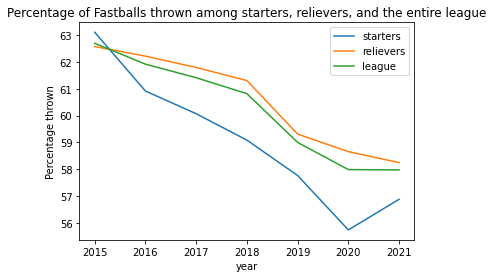

In [44]:
# Firstly, what we'll do is group our starters, relievers, and entire league data by year, and take average of number of each pitch thrown
grouped_starters = starters.groupby(by=['year'])[['n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted']].mean().reset_index()
grouped_relievers = relievers.groupby(by=['year'])[['n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted']].mean().reset_index()
grouped_league = adjusted_pitch_data.groupby(by=['year'])[['n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted']].mean().reset_index()

# We'll create a function to prevent code reuse. We will call on this to make our linegraphs for the upcoming analysis
def line_graph_maker(column, title):
    
    # To start, we'll utilize Seaborn's lineplot feature to give us a look at our data
    sns.lineplot(x='year', y=column, data=grouped_starters)
    sns.lineplot(x='year', y=column, data=grouped_relievers)
    sns.lineplot(x='year', y=column, data=grouped_league)

    # Finally, we will use Matplotlib to add a legend to our graph
    plt.ylabel("Percentage thrown")
    plt.title("Percentage of " + title + " thrown among starters, relievers, and the entire league")
    plt.legend(labels=['starters', 'relievers', 'league'])

line_graph_maker('n_fastball_formatted', "Fastballs")


Very interesting! Since the introduction of the statcast era, pitchers have been deciding to lay off throwing their fastballs. Starters have seen the most drastic change in this regard, throwing their fastballs >63% of the time in 2015 to around 57% in 2021. 

One thing worth mentioning is the 2020 season. The 2020 season will be a very interesting one in our analysis and one we will continue to mention moving forward. 2020 was our "Covid Year" and as a result many players would often miss games to do covid restrictions, or would outright not play at all. This could mean those that remained favored a certain style of pitch, and impacted these results.  

But returning to our original point, if the league is throwing fewer fastballs in the statcast era, what else are they throwing? Let's check our other pitches (breaking and offspeed) and see what they can show us.

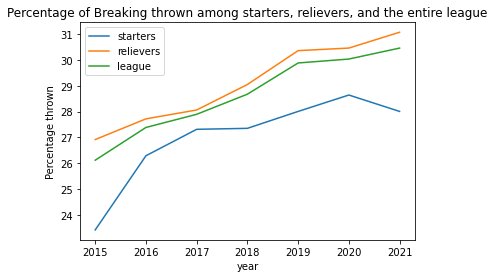

In [42]:
line_graph_maker('n_breaking_formatted', "Breaking")

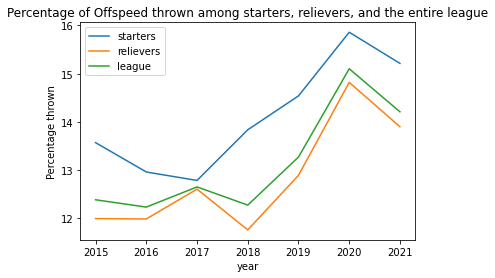

In [43]:
line_graph_maker('n_offspeed_formatted', "Offspeed")

Very Cool! We notice that curveballs have had a incredible surge in usage in the last 7 years, rising nearly 4% leaguewide while offspeed pitches have seen an increase but not much, rising only ~1% in the last 7 years. 

We can also see a big shift in favorites regarding relievers and starters here. Starters and relievers both moved away from their fastballs, but Starters looked to favor breaking balls and offspeed more than relievers, gaining ~3% in total breaking ball use and ~1.5% increase in offspeed use. Relievers opted to focus most of their repetiore toward their breaking ball, throwing that pitch 4% more than they did 7 years ago, and their offspeed ~2% more than 7 years prior. 

Finally, the most interesting thing of note is the divergence on the breaking ball preference. After the 2020 season, Relievers opted to throw less offspeed and fastballs in favor of breaking balls. While Starters opted to revoke both breaking and offspeed pitches in favor of the fastball, breaking a nearly 6 year trend in decline. 